In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('tops.csv')

In [2]:
import re
df['top'] = df['top'].apply(lambda x: re.sub(r'Drucksache ([0-9]+)/([0-9]+)', '', x))
df['top'] = df['top'].apply(lambda x: re.sub(r'(Befragung der Bundesregierung|Befragung|Fragestunde)', '', x))

from tqdm.notebook import tqdm
from nltk import word_tokenize

indexes = []
for i, x in tqdm(enumerate(df['top'])):
    tok = word_tokenize(x, language='german')
    if len(tok) > 6:
        indexes.append(i)

df = df.loc[indexes]
df.index = np.arange(df.shape[0])

0it [00:00, ?it/s]

In [3]:
df 

,top,top_id
0,a) Erste Beratung des von der Bundesregierung ...,1766
1,Deutschland auf zukünftige Pandemien besser vo...,408
2,5 Erste Beratung des von der Bundesregierung e...,27
3,Fortsetzung der Beteiligung bewaffneter deutsc...,1070
4,Erste Beratung des von den Fraktionen der CDU/...,898
...,...,...
1578,Aktuelle Stunde Haltung der Bundesregierung zu...,99
1579,Reform der Nachrichtendienste – Lehren aus dem...,1465
1580,Den sozialen Zusammenhalt während der Corona-K...,390
1581,Regionale Ernährungssysteme stärken Mehr Bildu...,1467


In [4]:
import tensorflow_hub as hub
import tensorflow_text
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")
enc = embed(df['top']).numpy()

<AxesSubplot:>

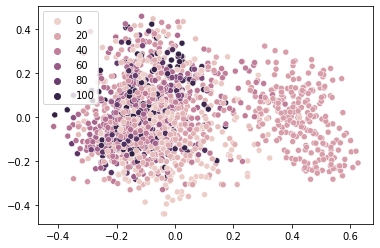

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
c = AgglomerativeClustering(n_clusters=None, distance_threshold=0.75, affinity='cosine', linkage='average').fit_predict(enc)

XX = PCA(n_components=2).fit_transform(enc)
sns.scatterplot(x=XX[:, 0], y=XX[:, 1], hue=c)

In [10]:
def cosine_similarity(vector_1, vector_2):
    return np.dot(vector_1, vector_2)/(np.linalg.norm(vector_1) * np.linalg.norm(vector_2))

def nearest_neighbor(v, candidates, k=1):
    indices = np.argsort([cosine_similarity(v, row) for row in candidates])[-k:]
    distances = [cosine_similarity(v, row) for row in candidates[indices]]
    return indices, distances

['Agrarpolitischer Bericht der Bundesregierung 2019 Die Freisetzungsrichtlinie 2001/18/EG in ihrer Regelungsschärfe auch für neue Gentechnik beibehalten – Regulierung im Einklang mit dem Vorsorgeprinzip auch in Zukunft sichern hier:  Stellungnahme gegenüber der Bundesregierung gemäß Artikel 23 Absatz 2 des Grundgesetzes Landwirtschaft und Ernährung zukunftsfähig machen Schutz für bäuerliche Betriebe vor übergroßer Marktmacht'
 'Nationale Bioökonomiestrategie Nationale Bioökonomiestrategie der Bundesregierung SMART gestalten'
 'Haltung der Bundesregierung zur Nichtberücksichtigung der Bekämpfung von Klimakrise und des Artensterbens bei der Reform der Gemeinsamen Agrarpolitik (GAP)'
 'Dürre bekämpfen, Land und Städte widerstandsfähig aufstellen, in Klimaschutz investieren Unabhängigkeit und Innovation zur Krisenprävention in der Landwirtschaft'
 'Aus BioNTech-Erfolg lernen – Aktionsprogramm für den Gentechnik-Standort Deutschland vorlegen Chancen neuer Züchtungsmethoden erkennen – Für ei

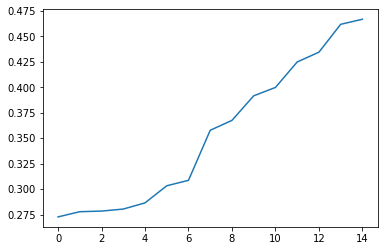

In [11]:
sentence = 'ökologische Landwirtschaft'
e = embed([sentence]).numpy()[0]
neighbor_indx, distances = nearest_neighbor(e, enc, k=15)
print(df.loc[neighbor_indx]['top'].values)
plt.plot(distances)
plt.show()

In [12]:
latent_df = pd.read_csv('latent_space_all_20210811-2045.csv')
latent_df.index = latent_df.original_index
speech_df = pd.read_csv('rede_fraktion_top_ids.csv')

In [13]:
latent_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,fraktion,original_index
original_index,,,,,,,,,,,,,,,,,,,,,
0,-0.774191,1.104383,2.727813,-1.016565,0.084143,-0.273512,1.777052,-0.695911,2.730222,-0.806362,...,2.046167,-2.002246,1.511957,1.918362,-0.588854,0.471170,3.075633,2.894923,AfD,0
1,-0.630624,0.675854,2.700955,-0.912433,-0.125235,-0.566876,1.882049,-0.286094,2.694194,-0.250011,...,1.672368,-1.807868,1.425072,1.889919,-0.503442,0.038449,3.335847,3.258862,AfD,1
2,0.047354,1.429626,2.470102,0.890683,2.427348,1.644049,0.461115,0.410154,2.288965,1.290096,...,1.357649,-1.473382,2.161093,0.937695,-0.045597,1.548001,1.631770,0.155468,FDP,2
3,-0.764105,2.639217,2.768412,-0.433579,2.301017,1.029992,0.446385,0.004400,2.631876,1.343377,...,3.031811,-1.788358,2.586317,0.648813,-0.203445,1.718697,1.993000,0.041919,FDP,3
4,-1.039774,1.828104,3.000094,-0.689559,1.170432,0.143157,1.466203,-0.518276,3.403773,0.794738,...,2.502271,-1.947070,2.127182,1.584145,-0.817894,1.535116,3.052863,1.441797,AfD,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20485,0.688110,1.602418,2.022565,1.312116,1.925306,1.990131,1.379103,0.692551,2.599525,2.347870,...,1.911646,-1.492462,2.841784,0.244504,-0.416021,0.952703,2.639742,0.950268,SPD,20485
20486,-0.212848,1.374241,2.608696,0.356111,2.086279,1.354307,0.740723,0.171822,2.301626,1.132632,...,1.196203,-1.567987,1.622516,1.083500,-0.388765,1.544448,1.327806,-0.329106,FDP,20486
20487,0.044910,1.304812,3.264149,0.465600,2.160903,1.223590,-0.294593,0.125270,2.157235,1.606188,...,1.381548,-1.998904,2.727492,1.542044,0.207152,1.003422,1.564406,0.221637,Linke,20487


In [14]:
def get_matching_speeches(phrase, k=30):
    e = embed([phrase]).numpy()[0]
    neighbor_indx, distances = nearest_neighbor(e, enc, k=k)
    
    #print(df.loc[neighbor_indx]['top'].values)
    
    top_ids = df.loc[neighbor_indx]['top_id'].values
    indx = speech_df[speech_df['top_id'].isin(top_ids)].index
    sel = latent_df.loc[indx]
    return sel.values[:, :25].astype(np.float), sel['fraktion']

m = {"AfD": 4, "B90": 5, "Union": 1, "Linke": 0, "FDP": 3, "SPD": 2, "fraktionslos":6}

<AxesSubplot:>

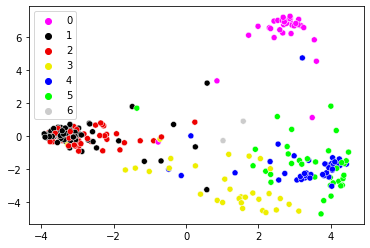

In [18]:
X, labels = get_matching_speeches('Waffenexporte', k=30)
XX = PCA(n_components=2).fit_transform(X)

#from sklearn.manifold import TSNE
#XX = TSNE(n_components=2, perplexity=150).fit_transform(X)

palette = [ "#FF00FF", "#000000", "#EE0000", "#EEEE00", "#0000FF", "#00FF00", "#CCCCCC"]
sns.scatterplot(x=XX[:, 0], y=XX[:, 1], hue=[m[x] for x in labels], palette=palette[:len(set(labels))])